<h1>1 Exploratory Data Analysis (EDA)</h1>

<h2>1.1 Dataset overview</h2>
<p>The Abalone dataset contains physical measurements of marine mollusks.</p>
<p>The goal is to analyze the dataset structure and relationships between features prior to applying machine learning models.</p>

In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/abalone.csv")

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
df.shape

(4177, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<p>The dataset consists of 9 columns (attributes/features) and 4,177 rows (instances).</p>
<p>The target variable is the Rings column, which represents the number of rings on the abalone.</p>

<h2>1.2 Data types & missing values</h2>

In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

<p>The only categorical attribute is Sex (the abalone’s sex), while all other attributes are numerical.</p>
<p>Among the numerical attributes, all are real-valued except the target variable Rings, which is an integer.</p>

In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<p>The dataset does not contain missing values, which simplifies preprocessing.</P>

<h2>1.3 Target variable analysis (Rings)</h2>

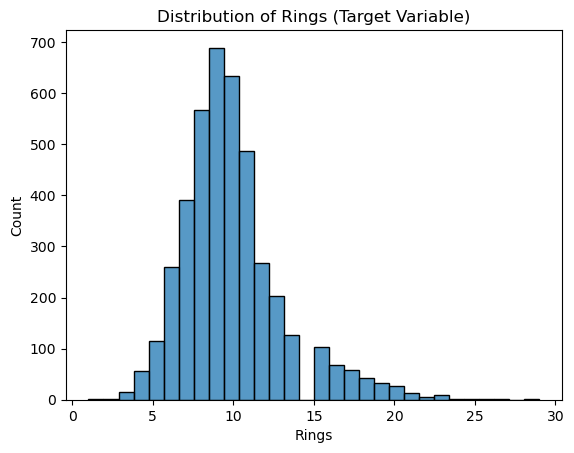

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["Rings"], bins=30)
plt.title("Distribution of Rings (Target Variable)")
plt.show()

In [8]:
df["Rings"].describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

<p>The target variable Rings ranges from 1 to 29, with the majority of observations concentrated between 8 and 11 rings. The median value is 9, while the mean is approximately 9.93, indicating that most samples are centered around lower to mid-range values, with a smaller number of observations corresponding to much older abalones.</p>

<p>The distribution of Rings exhibits a slight right (positive) skewness, which is evident both from the histogram and from the fact that the mean is greater than the median (row named 50% in the table alove). This indicates the presence of a longer tail toward higher ring counts, representing older individuals that appear less frequently in the dataset.</p>

<h2>1.4 Feature distribution</h2>

In [9]:
numerical_features=df.drop(columns=["Sex","Rings"]).columns

summary = []
for col in numerical_features:
        summary.append({
            "Feature": col,
            "Mean": df[col].mean(),
            "Median": df[col].median(),
            "Mode": df[col].mode().iloc[0] 
        })

pd.DataFrame(summary)

,Feature,Mean,Median,Mode
0,Length,0.523992,0.5450,0.5500
1,Diameter,0.407881,0.4250,0.4500
2,Height,0.139516,0.1400,0.1500
3,Whole weight,0.828742,0.7995,0.2225
4,Shucked weight,0.359367,0.3360,0.1750
5,Viscera weight,0.180594,0.1710,0.1715
6,Shell weight,0.238831,0.2340,0.2750


AttributeError: Rectangle.set() got an unexpected keyword argument 'binsa'

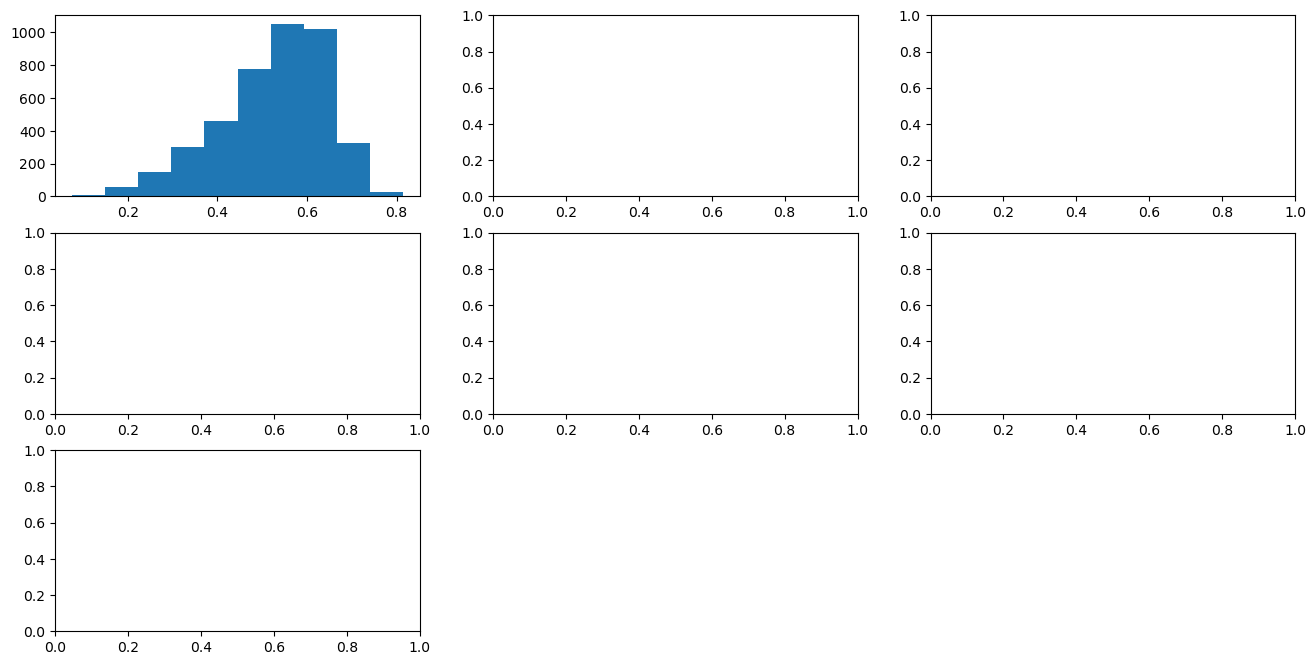

In [10]:


df[numerical_features].hist(figsize=(16, 8), binsa=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()

<p>The size-related features (Length and Diameter), have distributions that are mostly symmetric, with only slight asymmetry caused by their natural biological limits. On the other hand, Height and all weight-related features show clear right (positive) skewness, meaning that most values are concentrated at lower levels while a smaller number of observations extend toward higher values, creating long right tails and possible outliers.</p>

<p>Because the numerical features have different ranges and some are skewed, feature scaling is needed when using machine learning models that are sensitive to feature magnitude, such as linear models and distance-based algorithms. In contrast, tree-based models are generally more robust to skewed distributions and outliers and are therefore less affected by these characteristics.</p>

<h2>1.5 Categorical feature (Sex)</h2>

In [ ]:
df["Sex"].unique()

array(['M', 'F', 'I'], dtype=object)

In [17]:
sex_percentages= df["Sex"].value_counts(normalize=True)*100

sex_percentages

Sex
M    36.581278
I    32.128322
F    31.290400
Name: proportion, dtype: float64

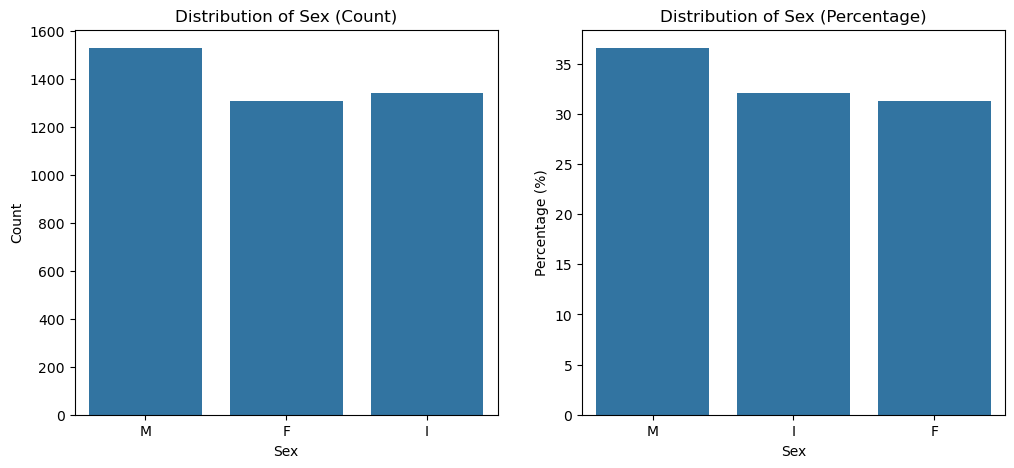

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x="Sex", data=df, ax=axes[0])
axes[0].set_title("Distribution of Sex (Count)")
axes[0].set_ylabel("Count")

sns.barplot(
    x=sex_percentages.index,
    y=sex_percentages.values,
    ax=axes[1]
)
axes[1].set_title("Distribution of Sex (Percentage)")
axes[1].set_ylabel("Percentage (%)")


plt.show()

<p>Categorical attribute Sex has three unique values: M (male), F (female), I (Infant).</p>
<p>The distribution of these values is a bit uneven, where almost 37% of abalones are male, while infants and females are closer to 31% and 32% respetivley. The differences between categories are small and should not significantly affect model performance.</p>